In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import sympy as sy
sy.init_printing() 

# <font face="gotham" color="purple"> Null Space </font>

The **null space**, denoted as $\text{Nul}A$ is the solution set of a homogeneous linear system, i.e. $Ax=0$. 

A null space is a always a subspace of $\mathbb{R}^n$, why? Because the solution can always be at origin $(0, 0, ...)$.

As an example, consider a linear system.

$$
2x_1-x_2+x_3 = 0\\
x_1+2x_2+3x_3= 0 
$$

The augmented matrix is 

$$
\left[
\begin{matrix}
2 & -1 & 1 & 0\\
1 & 2 & 3 & 0
\end{matrix}
\right]
$$

Before solving the system, we have already known there is no unique solution since a free variable presents, due to fact that two equation with three variables.

Solve for the reduced echelon form.

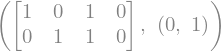

In [2]:
Aug = sy.Matrix([[2,-1,1,0],[1,2,3,0]])
Aug.rref()

$x_3$ is a free variable, the solution set can be written as

$$
\left[
\begin{matrix}
x_1 \\ x_2 \\ x_3
\end{matrix}
\right]=
\left[
\begin{matrix}
-x_3 \\ -x_3 \\ x_3
\end{matrix}
\right]=
x_3\left[
\begin{matrix}
-1 \\ -1 \\ 1
\end{matrix}
\right]
$$

which is a line passing both origin $(0, 0, 0)$ and $(-1, -1, 1)$, also a subspace of $\mathbb{R}^3$.

Consider another example, suppose we have an augmented matrix

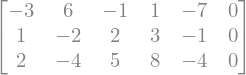

In [3]:
Aug = sy.Matrix([[-3,6,-1,1,-7,0],[1,-2,2,3,-1,0],[2,-4,5,8,-4,0]]);Aug

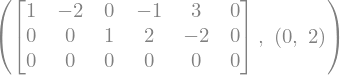

In [4]:
Aug.rref()

The solution can be written as:

$$
\left[
\begin{matrix}
x_1 \\ x_2 \\ x_3 \\x_4 \\ x_5
\end{matrix}
\right]=
\left[
\begin{matrix}
2x_2+x_4-3x_5 \\ x_2 \\ -2x_4+2x_5 \\x_4 \\ x_5
\end{matrix}
\right]=
x_2\left[
\begin{matrix}
2 \\ 1 \\ 0 \\0 \\ 0
\end{matrix}
\right]
+
x_4\left[
\begin{matrix}
1 \\ 0 \\ -2 \\1 \\ 0
\end{matrix}
\right]
+x_5\left[
\begin{matrix}
-3 \\ 0 \\ 2 \\0 \\ 1
\end{matrix}
\right]
$$

The $\text{Nul}A$ is a subspace in $\mathbb{R}^5$ with $\text{dim}A=3$. 

# <font face="gotham" color="purple"> Null Space vs Col Space </font>

Consider matrix $A$

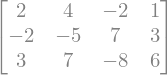

In [5]:
A = sy.Matrix([[2,4,-2,1],[-2,-5,7,3],[3,7,-8,6]]);A

Column space is a subspace in $\mathbb{R}^n$, what is $n$? It is the number of rows, $n=3$.

Null space is a subspace in $\mathbb{R}^m$, what is $m$? It is the number of columns, $m=4$.

How to find any nonzero vector in $\text{Col}A$ and in $\text{Nul}A$?

Any column in a matrix can be a nonzero vector in $\text{Col}A$, for instance first column: $(2, -2, 3)^T$.

But to find a nonzero vector in null space requires some effort, construct the augmented matrix then turn it into rref.

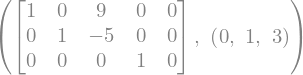

In [6]:
Aug = sy.Matrix([[2,4,-2,1,0],[-2,-5,7,3,0],[3,7,-8,6,0]]);Aug.rref()

The solution set with a free variable $x_3$ (because column 3 has no pivot) is 

$$
\left[
\begin{matrix}
x_1 \\ x_2 \\ x_3\\x_4
\end{matrix}
\right]=
\left[
\begin{matrix}
-9x_3 \\ 5x_3 \\ x_3\\0
\end{matrix}
\right]
$$

If we pick $x_3 =1$, a nonzero vector in $\text{Nul}A$ is $(-9, 5, 1, 0)^T$

Now consider two vectors

$$
u = \left[
\begin{matrix}
3 \\ -2 \\ -1\\ 0 
\end{matrix}
\right],\qquad
v = \left[
\begin{matrix}
3 \\ -1\\3
\end{matrix}
\right]\\
$$

Is $u$ in $\text{Nul}A$? It can be verified easily

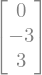

In [7]:
u = sy.Matrix([[3],[-2],[-1],[0]])
A*u

$Au\neq \mathbf{0}$, therefore $u$ is not in $\text{Nul}A$.

Is $v$ in $\text{Col}A$? Construct an augmented matrix with $v$, then solve it

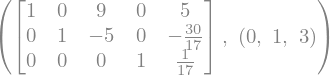

In [8]:
v = sy.Matrix([[3],[-1],[3]])
A.row_join(v).rref()

The augmented matrix show there are solutions, i.e. $v$ is a linear combination of its column space basis, so $v$ is in $\text{Col}A$.

# <font face="gotham" color="purple"> Row Space </font>

The **Row space** denoted as $\text{Row}A$, contains all linear combination of row vectors and subspace in $\mathbb{R}^n$.

If we perform row operations on $A$ to obtain $B$, both matrices have the same row space, because $B$'s rows are linear combinations of $A$'s. However, row operation will change the row dependence. 

## <font face="gotham" color="purple"> An Example </font>

Find the row, column and null space of 

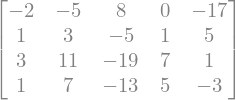

In [9]:
A = sy.Matrix([[-2, -5, 8, 0, -17],
               [1, 3, -5, 1, 5], 
               [3, 11, -19, 7, 1], 
               [1, 7, -13, 5, -3]]);A

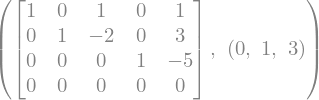

In [10]:
B = A.rref();B

The basis of the row space of $B$ is its first 3 rows: $(1,0,1,0,1), (0, 1, -2, 0, 3), (0, 0, 0, 1, -5)$ which are also the basis of the row space of $A$. However it does not necessarily mean that first 3 rows of $A$ forms the basis for row space, because the dependence among rows changed by row operation.

In constrast, the basis of col space of $A$ is $(-2, 1, 3, 1)^T, (-5, 3, 11, 7)^T, (0, 1, 7, 5)^T$.

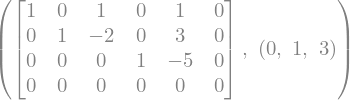

In [11]:
Aug = A.row_join(sy.zeros(4,1));Aug.rref()

The null space is 

$$
\left[
\begin{matrix}
x_1 \\ x_2 \\ x_3\\x_4 \\x_5
\end{matrix}
\right]=
\left[
\begin{matrix}
-x_3-x_5 \\ 2x_3-3x_5 \\ x_3\\5x_5 \\x_5
\end{matrix}
\right]=
x_3\left[
\begin{matrix}
-1 \\ 2 \\ 1\\0 \\0
\end{matrix}
\right]+
x_5
\left[
\begin{matrix}
-1 \\ -3 \\ 0\\5 \\1
\end{matrix}
\right]
$$

# <font face="gotham" color="purple"> Rank </font>

Definition of rank:
The **rank** is the dimension of the column space of $A$. The **nullity** of $A$ is the dimension of the null space.

## <font face="gotham" color="purple"> The Rank Theorem</font>

The dimensions of the column space and the row space of an $m \times n$ matrix $A$ are equal that is why we only need to say rank is the dimension of the column space. 

This common dimension, the rank of $A$, also equals the number of pivot positions in $A$ and satisfies the equation
$$
\operatorname{rank} A+\operatorname{dim} \mathrm{Nul} A=n
$$

The intuition is that when a matrix $A$ is converted into rref $B$, we can indirectly(matching the same column from $B$ to $A$) see the basis of column space, those columns in corresponding rref have pivots. 

And in rref, we can also see the basis of row space directly, every row in the basis of row space must have a pivot. And those rows which does not have pivots are for free variables, which is the dimension of null space. 

## <font face="gotham" color="purple"> Example 1 </font>

If $A$ is $45 \times 50$ matrix with a $10$-dimension nullity, what is the rank of $A$?

$10$-$D$ nullity means 10 free variables, so the pivots are $50-10=40$, which is also the rank of $A$.

## <font face="gotham" color="purple"> Example 2 </font>

The matrices below are row equivalent.
$$
A=\left[\begin{array}{rrrrr}
2 & -1 & 1 & -6 & 8 \\
1 & -2 & -4 & 3 & -2 \\
-7 & 8 & 10 & 3 & -10 \\
4 & -5 & -7 & 0 & 4
\end{array}\right], \quad B=\left[\begin{array}{rrrrr}
1 & -2 & -4 & 3 & -2 \\
0 & 3 & 9 & -12 & 12 \\
0 & 0 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0
\end{array}\right]
$$
1. Find rank $A$ and $\operatorname{dim}$ Nul $A$
2. Find bases for Col $A$ and Row $A$.
3. What is the next step to perform to find a basis for Nul $A$ ?
4. How many pivot columns are in a row echelon form of $A^{T} ?$

1. $rank(A)=2$, because $B$ has two pivots. And nullity is the number of free variables, there are 3, so $\text{dim Nul}A = 3$. 

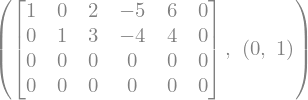

In [12]:
A = sy.Matrix([[2,-1,1,-6,8,0],
               [1,-2,-4,3,-2,0],
               [-7,8,10,3,-10,0],
               [4,-5,-7,0,4,0]])
A.rref()

2. Bases for $\text{Col}A$ is $(2,1,-7,4)^T, (-1,-2,8,-5)^T$, and for $\text{Row}A$ is $(1,-2,-4,3,-2),(0,3,9,-12,12)$.

The $\text{Nul}A$ and basis is

$$
\left[
\begin{matrix}
x_1 \\ x_2 \\ x_3\\x_4 \\x_5
\end{matrix}
\right]=
\left[
\begin{matrix}
-2x_3+5x_4-6x_5 \\ -3x_3+4x_4-4x_5 \\ x_3\\x_4 \\x_5
\end{matrix}
\right]=
x_3
\left[
\begin{matrix}
-2 \\ -3 \\ 1\\0 \\0
\end{matrix}
\right]+
x_4
\left[
\begin{matrix}
5 \\ 4 \\ 0\\1 \\0
\end{matrix}
\right]+
x_5
\left[
\begin{matrix}
-6 \\ -4 \\ 0\\0 \\1
\end{matrix}
\right]
$$

3. Perform rref on augmented $A$

4. Transpose $A$ then do rref.

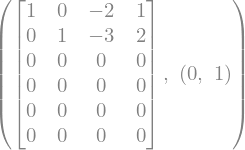

In [13]:
A.T.rref()

There are 2 pivot columns.

Actually, we don't need any calculation to know the rank of $A^T$, because

$$
rank(A)=rank(A^T)
$$

# <font face="gotham" color="purple"> Orthogonality of $\text{Nul}A$ and $\text{Row}A$ </font>

##  <font face="gotham" color="purple"> $\text{Nul}A \perp \text{Row}A$  </font>

Here is the intersting connections of these subspaces we have discussed. Consider

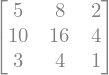

In [14]:
A = sy.Matrix([[5, 8, 2], [10, 16, 4], [3, 4, 1]]);A

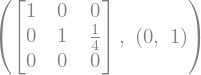

In [15]:
A.rref()

The basis of row space of $A$ is $(1, 0, 0)$ and $(0, 1, .25)$.And the $\text{Row}A$ is 

$$
\text{Row}A=
s\left[
\begin{matrix}
1 \\ 0\\ 0
\end{matrix}
\right]+
t\left[
\begin{matrix}
0 \\ 1\\ 0.25
\end{matrix}
\right]
$$

The $\text{Nul}A$ is 
$$
\left[
\begin{matrix}
x_1 \\ x_2\\ x_3
\end{matrix}
\right]=
x_3
\left[
\begin{matrix}
0 \\ -.25\\ 1
\end{matrix}
\right]
$$

Now we can visualize their relations geometrically. Again keep in mind that Matplotlib does not render 3D properly, so you need some imagination as well.

Here is what we observe. 

The $\text{Row}A$ is a plane and $\text{Nul}A$ is a line which is perpendicular to the plane. It is easy to grasp the idea if you notice that in a homogeneous system $Ab = \mathbf{0}$, it breaks down into many dot products

$$
Ab =\left[
\begin{matrix}
A_{1i}\cdot b \\ A_{2i}\cdot b\\ A_{3i}\cdot b
\end{matrix}
\right]
$$

where $A_{1i}, A_{2i}, A_{3i}$ are the rows of $A$. In later chapters we will prove when the dot product of two vectors equals zero, which means geometrically they are perpendicular.

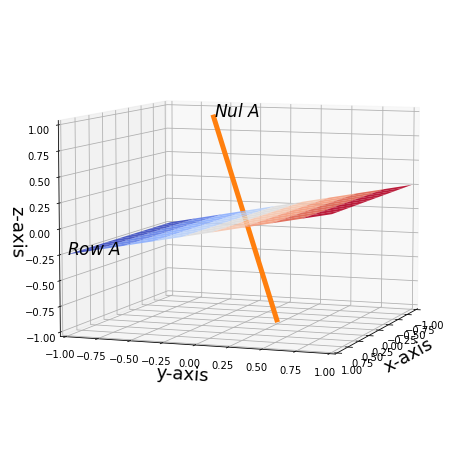

In [16]:
%matplotlib inline
s = np.linspace(-1, 1, 10)
t = np.linspace(-1, 1, 10)
S, T = np.meshgrid(s, t)

X = S
Y = T
Z = T*.25

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X, Y, Z, alpha = .9, cmap=plt.cm.coolwarm)

x3 = np.linspace(-1, 1, 10)
x1 = 0*x3
x2 = -.25*x3
ax.plot(x1,x2,x3, lw = 5)

ax.set_xlabel('x-axis', size = 18)
ax.set_ylabel('y-axis', size = 18)
ax.set_zlabel('z-axis', size = 18)

ax.axis([-1,1,-1,1])

ax.text(x = 1, y = -1, z = -.25, s = r'$Row\ A$', size = 17)
ax.text(0, -.25, 1, s = r'$Nul\ A$', size = 17)

ax.view_init(7, 20)
plt.show()

##  <font face="gotham" color="purple"> $\text{Nul}A^T \perp \text{Col}A$  </font>

The nullity of $A^T$ is

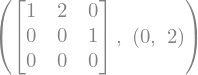

In [17]:
A = sy.Matrix([[5, 8, 2], [10, 16, 4], [3, 4, 1]]);A.T.rref()

The $\text{Nul}A^T$ is 

$$
\left[
\begin{matrix}
x_1 \\ x_2\\ x_3
\end{matrix}
\right]=
x_2
\left[
\begin{matrix}
-2 \\ 1\\ 0
\end{matrix}
\right]
$$

The  $\text{Col}A$ is 

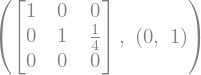

In [18]:
A.rref()

$$
\text{Col}A=
s\left[
\begin{matrix}
5 \\ 10\\ 3
\end{matrix}
\right]+
t\left[
\begin{matrix}
8 \\ 16\\ 4
\end{matrix}
\right]
$$

$\text{Col}A$ is a plane and $\text{Nul}A^T$ is a line perpendicular to the plane. The intuition is similar to $\text{Nul}A \perp \text{Row}A$, here you can think of a system look like $b^TA = \mathbf{0}^T$.

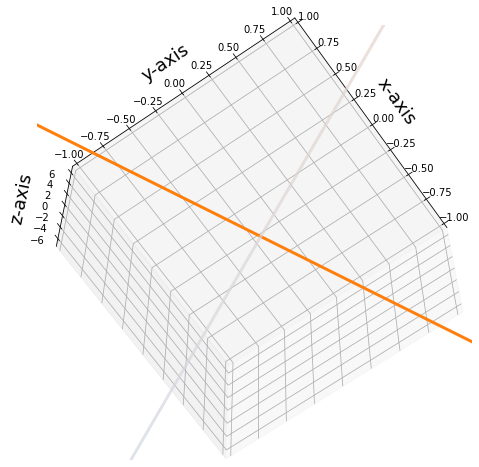

In [19]:
%matplotlib inline
s = np.linspace(-1, 1, 10)
t = np.linspace(-1, 1, 10)
S, T = np.meshgrid(s, t)

X = 5*S+8*T
Y = 10*S+16*T
Z = 3*S+4*T

fig = plt.figure(figsize = (8,8))

ax = fig.add_subplot(111,projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.coolwarm)

x2 = np.linspace(-1, 1, 10)
x3 = x2*0
x1 = -2*x2

ax.plot(x1,x2,x3, lw = 3)

ax.set_xlabel('x-axis', size = 18)
ax.set_ylabel('y-axis', size = 18)
ax.set_zlabel('z-axis', size = 18)

ax.axis([-1,1,-1,1])

ax.view_init(-67, 35)

# <font face="gotham" color="purple"> Rank Decomposition </font>

Consider a matrix $A$, the purpose is to decompose it into the multiplication of $C$, $R$, which are the  bases of column space and row space respectively.

$$
A = CR
$$

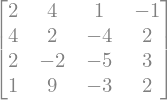

In [20]:
A = sy.Matrix([[2, 4, 1, -1], [4, 2, -4, 2], [2, -2, -5, 3], [1, 9, -3, 2]]);A

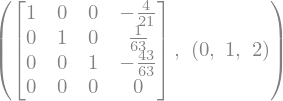

In [21]:
Arref = A.rref();Arref

Get the basis of $\text{Col}A$.

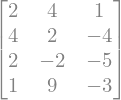

In [22]:
ColA_basis = A[:,:3];ColA_basis

Then get the $\text{Row}A$.

In [ ]:
RowA_basis = Arref[0][0:3,:];RowA_basis

Multiply $CR$, we are getting back $A$.

In [ ]:
ColA_basis*RowA_basis

Verify if $CR$ equals $A$.

In [ ]:
ColA_basis*RowA_basis == A